In [20]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from funcoes_extracao import *
from collections import Counter

In [21]:
df = pd.read_excel("results/resultados500.xlsx")
novo_df = concatenador(df)
novo_df = novo_df.rename(columns={'sentenca': 'abstract'})
novo_df = novo_df.rename(columns={'dens_pot': 'mw/cm2'})
novo_df = novo_df.rename(columns={'temp_op': 'degrees C'})
novo_df.to_excel('resultados_preprocessados.xlsx', index=False)


In [22]:
display(novo_df)

,artigo_id,abstract_id,sentenca_id,abstract,modelo,temperatura,top_p,top_k,resposta,catodo,anodo,eletrolito,degrees C,mw/cm2,combustivel
0,78,58,10,The harmful effect of carbon pollution leads t...,mistral-large:123b,0,0.25,1,[],[],[],[],[],[],[]
1,185,134,7,"Solid-oxide fuel cells with ceria, ceria-Cu, a...",mistral-large:123b,0,0.25,1,"[ceria, ceria-Cu, ceria-Rh]",[],"[ceria, ceria-Cu, ceria-Rh]",[],[],[0.25 W cm(-2)],[waste vegetable oil]
2,187,169,6,Solid oxide fuel cell power generation systems...,mistral-large:123b,0,0.25,1,[],[],[],[],[],[],[natural gas]
3,210,288,6,The study of anodic and cathodic reactions sep...,mistral-large:123b,0,0.25,1,[],[],[],[],[],[2 W cm(-2)],[]
4,283,312,10,Full commercialisation of the solid oxide fuel...,mistral-large:123b,0,0.25,1,[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,20965,400,13,An understanding of the high-temperature proce...,mistral-large:123b,0,0.25,1,[],[],[],[],[],[],[]
496,21013,170,12,The influence of a specific surface area of ev...,mistral-large:123b,0,0.25,1,[],[],[],[],"[600 degrees C, 600 degrees C]",[],[]
497,21037,395,17,Vaporization of Cr species from solid oxide fu...,mistral-large:123b,0,0.25,1,[],[],[],[],[800 degrees C],[],[]
498,21066,273,10,The impacts of increasing deployment of Renewa...,mistral-large:123b,0,0.25,1,[],[],[],[],[],[],[]


In [24]:
novo_df['mw/cm2'] = novo_df['mw/cm2'].apply(processar_densidade)
novo_df['degrees C'] = novo_df['degrees C'].apply(processar_temperatura)

print("DataFrame antés da remoção:")
print(len(novo_df))

novo_df = novo_df.loc[novo_df['resposta'].apply(lambda x: len(x) > 0)]

print("DataFrame após a remoção das listas vazias:")
print(len(novo_df))

todos_materiais = []

for i in novo_df["resposta"]:
    for j in i:
        todos_materiais.append(j)

print("Quantidade de Materiais encontrados:")
print(len(todos_materiais))

todos_combustivel = []

for i in novo_df["combustivel"]:
    for j in i:
        todos_combustivel.append(j)

print("Quantidade de Combustiveis encontrados:")
print(len(todos_combustivel))

DataFrame antés da remoção:
221
DataFrame após a remoção das listas vazias:
221
Quantidade de Materiais encontrados:
667
Quantidade de Combustiveis encontrados:
82


C:\Users\andre23035\AppData\Local\Temp\ipykernel_30764\3609982618.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  eixo.set_xticklabels(materiais, rotation=45)


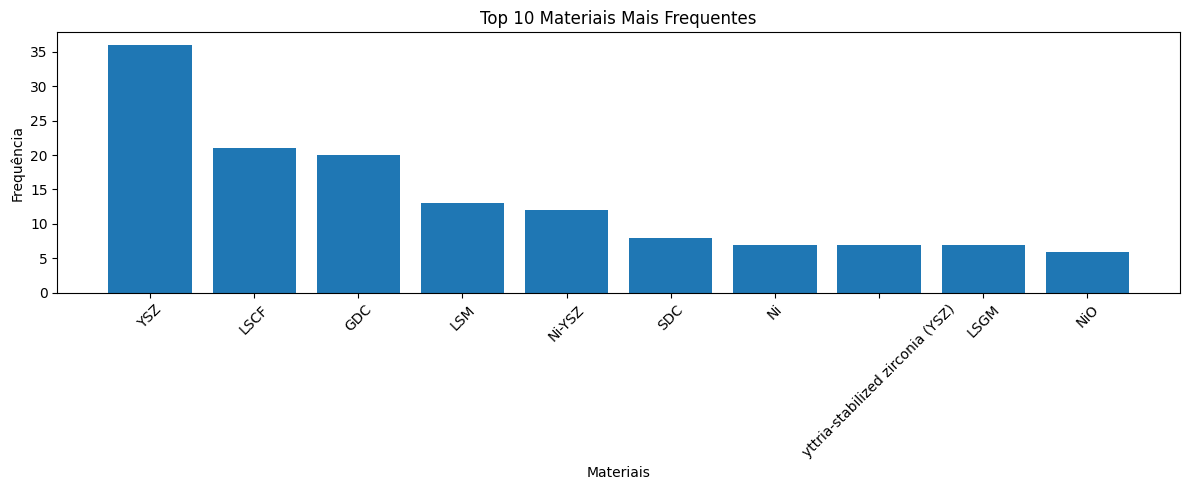

In [17]:
contagem = Counter(todos_materiais)
top_10 = contagem.most_common(10)

# Separar os valores e as frequências
materiais, frequencias = zip(*top_10)

# Criar o gráfico de barras
fig, eixo = plt.subplots(figsize=(12, 5))
eixo.bar(materiais, frequencias)

# Configurar o título e os rótulos
eixo.set_title('Top 10 Materiais Mais Frequentes')
eixo.set_ylabel('Frequência')
eixo.set_xlabel('Materiais')

# Girar os rótulos do eixo x
eixo.set_xticklabels(materiais, rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()

C:\Users\andre23035\AppData\Local\Temp\ipykernel_30764\3268760984.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  eixo.set_xticklabels(combustiveis, rotation=45)


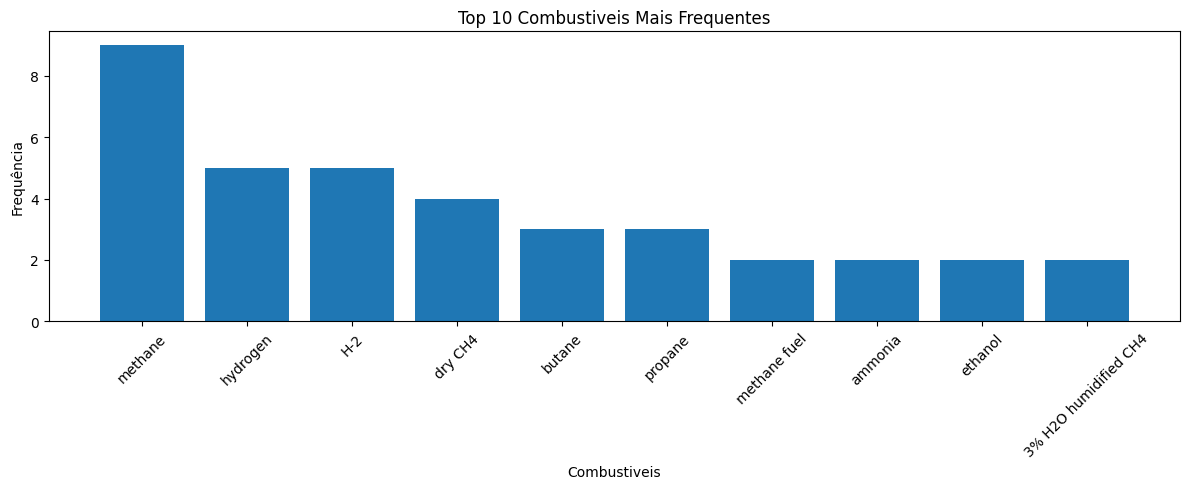

In [33]:
contagem = Counter(todos_combustivel)
top_10 = contagem.most_common(10)

# Separar os valores e as frequências
combustiveis, frequencias = zip(*top_10)

# Criar o gráfico de barras
fig, eixo = plt.subplots(figsize=(12, 5))
eixo.bar(combustiveis, frequencias)

# Configurar o título e os rótulos
eixo.set_title('Top 10 Combustiveis Mais Frequentes')
eixo.set_ylabel('Frequência')
eixo.set_xlabel('Combustiveis')

# Girar os rótulos do eixo x
eixo.set_xticklabels(combustiveis, rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Temperatura de Operação das Células')

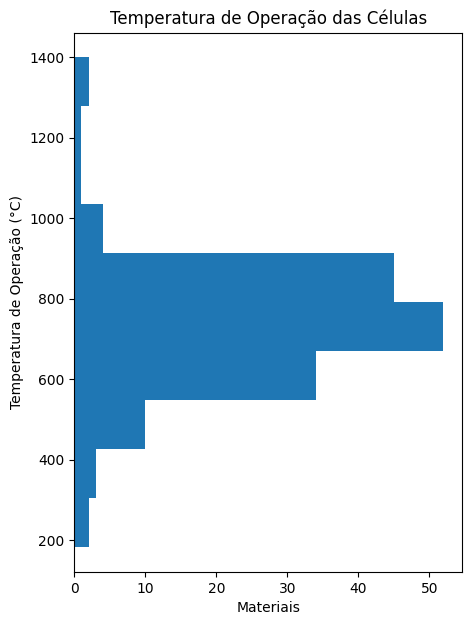

In [34]:
fig, eixo = plt.subplots(figsize=(5, 7))
eixo.hist(novo_df["degrees C"], orientation="horizontal")
eixo.set_xlabel("Materiais")
eixo.set_ylabel("Temperatura de Operação (°C)")
plt.title("Temperatura de Operação das Células")

In [35]:
novo_df.to_excel('resultados_pósprocessados.xlsx', index=False)